In [5]:
sales_1 = read.csv("sales.csv")
library(dplyr)
library(tidyr)
library(texreg)
head(sales)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Version:  1.36.23
Date:     2017-03-03
Author:   Philip Leifeld (University of Glasgow)

Please cite the JSS article in your publications -- see citation("texreg").

Attaching package: ‘texreg’

The following object is masked from ‘package:tidyr’:

    extract



ERROR: Error in head(sales): object 'sales' not found


In [207]:
model4 = lm(pizza ~ ., data = sales_1)
test = stepAIC(model4)

ERROR: Error in stepAIC(model4): AIC is -infinity for this model, so 'stepAIC' cannot proceed


In [170]:
h<-sales[,-which(names(sales)%in% "date")]
sales<-h
sales
h

Warning message in rbind(parts$upper, ellip_v, parts$lower, deparse.level = 0L):
“number of columns of result is not a multiple of vector length (arg 2)”

1  
2  
3  
4  
5  
6  
7  
8  
9  
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 
22 
23 
24 
25 
26 
27 
28 
29 
30 
⋮  
84 
85 
86 
87 
88 
89 
90 
91 
92 
93 
94 
95 
96 
97 
98 
99 
100
101
102
103
104
105
106
107
108
109
110
111
112
113

Warning message in rbind(parts$upper, ellip_v, parts$lower, deparse.level = 0L):
“number of columns of result is not a multiple of vector length (arg 2)”

1  
2  
3  
4  
5  
6  
7  
8  
9  
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 
22 
23 
24 
25 
26 
27 
28 
29 
30 
⋮  
84 
85 
86 
87 
88 
89 
90 
91 
92 
93 
94 
95 
96 
97 
98 
99 
100
101
102
103
104
105
106
107
108
109
110
111
112
113

In [3]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [4]:
sales= rename(sales, 'wind' = 'windspeed')

In [118]:
sales <- mutate(sales, totalSales = pizza+pasta+wraps)
head(sales)

weekday,staff,pizza,wraps,pasta,dessert,fruitcup,chips,juice,soda,coffee,total_sales,temp,humidity,rainfall,wind,food,totalSales
Tuesday,Harry,5,25,5,5,1,12,8,20,41,199.95,36,82,0.00,12,1041,35
Wednesday,Sara,6,7,3,1,0,0,0,13,33,195.74,34,78,0.06,16,1041,16
Thursday,Sara,8,14,4,1,0,0,13,23,34,102.68,39,85,0.45,16,1041,26
Friday,Sara,4,5,5,3,3,20,0,13,27,162.88,40,85,0.00,12,1041,14
Monday,Harry,3,10,8,3,2,0,5,13,20,101.76,36,64,0.03,25,1041,21
Tuesday,Sara,7,5,1,5,2,4,4,33,23,186.94,26,62,0.00,23,1041,13


In [6]:
dim(sales) #113 rows

[1] 113  17

In [7]:
library(tidyr)

In [185]:
sales = drop_na(sales)

In [186]:
dim(sales)

[1] 43 17

In [10]:
113-43

[1] 70

In [11]:
sales = sales[,-which(names(sales) == "date")]

In [12]:
head(sales)

,weekday,staff,pizza,wraps,pasta,dessert,fruitcup,chips,juice,soda,coffee,total_sales,temp,humidity,wind,rainfall
1,Tuesday,1,5,25,5,5,1,12,8,20,41,199.95,36,82,12,0.00
2,Wednesday,2,6,7,3,1,0,0,0,13,33,195.74,34,78,16,0.06
3,Thursday,2,8,14,4,1,0,0,13,23,34,102.68,39,85,16,0.45
4,Friday,2,4,5,5,3,3,20,0,13,27,162.88,40,85,12,0.00
7,Monday,1,3,10,8,3,2,0,5,13,20,101.76,36,64,25,0.03
8,Tuesday,2,7,5,1,5,2,4,4,33,23,186.94,26,62,23,0.00


In [13]:
sales$staff = factor(sales$staff, levels=c(1,2,3,4), labels=c("Harry","Sara","Tom","Kate"))

In [14]:
sales$food = sales$pizza + sales$pasta + sales$wraps

In [15]:
head(sales)

,weekday,staff,pizza,wraps,pasta,dessert,fruitcup,chips,juice,soda,coffee,total_sales,temp,humidity,wind,rainfall,food
1,Tuesday,Harry,5,25,5,5,1,12,8,20,41,199.95,36,82,12,0.00,35
2,Wednesday,Sara,6,7,3,1,0,0,0,13,33,195.74,34,78,16,0.06,16
3,Thursday,Sara,8,14,4,1,0,0,13,23,34,102.68,39,85,16,0.45,26
4,Friday,Sara,4,5,5,3,3,20,0,13,27,162.88,40,85,12,0.00,14
7,Monday,Harry,3,10,8,3,2,0,5,13,20,101.76,36,64,25,0.03,21
8,Tuesday,Sara,7,5,1,5,2,4,4,33,23,186.94,26,62,23,0.00,13


In [212]:
sales_2= load("section_b.Rda")
dta = get(sales_2)
model_lm = lm(pizza ~ ., data = dta)
lm_step = step(model_lm)

Start:  AIC=59.23
pizza ~ weekday + staff + wraps + pasta + dessert + fruitcup + 
    chips + juice + soda + coffee + total_sales + temp + humidity + 
    rainfall + wind

              Df Sum of Sq    RSS    AIC
- rainfall     1    0.0599 67.304 57.265
- fruitcup     1    0.1971 67.441 57.352
- temp         1    0.2894 67.534 57.411
- wraps        1    1.1531 68.397 57.958
- juice        1    2.1493 69.394 58.580
- coffee       1    2.2210 69.465 58.624
- wind         1    2.4343 69.679 58.756
- soda         1    2.6954 69.940 58.917
- chips        1    3.0354 70.280 59.125
<none>                     67.244 59.227
- dessert      1    4.0711 71.315 59.754
- pasta        1    4.3792 71.623 59.940
- staff        2   10.3666 77.611 61.392
- total_sales  1    7.7488 74.993 61.916
- weekday      4   20.4280 87.672 62.633
- humidity     1   23.5725 90.817 70.149

Step:  AIC=57.26
pizza ~ weekday + staff + wraps + pasta + dessert + fruitcup + 
    chips + juice + soda + coffee + total_sales +

In [211]:

fit<-function(x,y,opt,Val=NULL,xlabel=NULL,ylabel=NULL,tit=NULL){
  library(texreg)
  
  if(opt=="poly1") {
    mdl<-lm(y~x)
    xframe<-data.frame(categ=x)
    yval<-predict(mdl,newdata=xframe)
  }
  else if (opt=="poly2"){
    mdl<-lm(y~poly(x,2))
    xframe<-data.frame(categ=x)
    yval<-predict(mdl,newdata=xframe)
  }
  else if (opt=="poly3"){
    mdl<-lm(y~poly(x,2))
    xframe<-data.frame(categ=x)
    yval<-predict(mdl,newdata=xframe)
  }
  else if (opt=="log"){
    mdl<-lm(y~log(x))
    xframe<-data.frame(categ=x)
    yval<-predict(mdl,newdata=xframe)
  }
  
  plot(x,y,xlab ="",ylab = "")
  lines(x,yval)
  grid(10, 10, lwd = 1,col='black')
  
  if(!is.null(xlabel)){
    title(xlab=xlabel)
  }
  if(!is.null(ylabel)){
    title( ylab=ylabel)
  }
  if(!is.null(tit)){
    title(main=tit)
  }
  print(screenreg(mdl))
  print(mdl)
  
  if(is.null(Val)) {
    attributes(yval)<-NULL
    return(yval[Val])
  }
  
  else if (!is.null(Val)) {
    #print(attr(yval,"names"))
    attributes(yval)<-NULL
    #print(yval[Val])
    return(yval[Val])
  }
  
}

a<-dta$coffee
b<-dta$temperature
c<-dta$humidity
d<-dta$windspeed


pred1<-fit(a,b,"poly1")
pred2<-fit(a,c,"poly1")
pred3<-fit(a,d,"poly1")

md1<-lm(a~b,data=dta)
md2<-lm(a~c,data=dta)
md3<-lm(a~d,data=dta)

screenreg(list(md1,md2,md3))


Warning message:
“Unknown or uninitialised column: 'temperature'.”Warning message:
“Unknown or uninitialised column: 'windspeed'.”

ERROR: Error in model.frame.default(formula = y ~ x, drop.unused.levels = TRUE): invalid type (NULL) for variable 'y'


Warning message:
“not plotting observations with leverage one:
  1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43”Warning message in min(x):
“no non-missing arguments to min; returning Inf”Warning message in max(x):
“no non-missing arguments to max; returning -Inf”

ERROR: Error in qqnorm.default(rs, main = main, ylab = ylab23, ylim = ylim, ...): y is empty or has only NAs


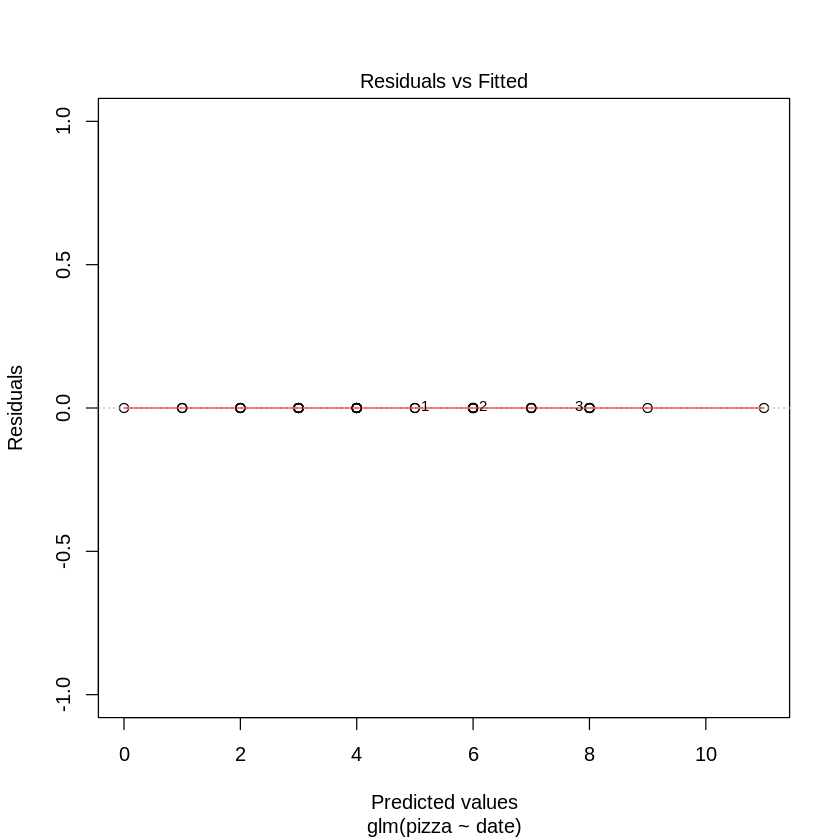

In [195]:
dta = sales
classifier_logreg = lm(pizza ~ ., data = sales)
#classifier_log = step(classifier_logreg)
plot(classifier_log)

In [70]:
aov(model_reg)

Call:
   aov(formula = model_reg)

Terms:
                  weekday     staff   dessert      soda total_sales  humidity
Sum of Squares  101.13224  13.23347   4.54359   1.41790     1.28836  45.83487
Deg. of Freedom         4         2         1         1           1         1
                Residuals
Sum of Squares   81.71237
Deg. of Freedom        32

Residual standard error: 1.597971
Estimated effects may be unbalanced

In [62]:
#b1
sum(sales$soda)

#b2
max(sales$wraps)

staff <- group_by(sales, staff)
summarise(staff, mean_h = mean(total_sales))

[1] 1277

[1] 25

staff,mean_h
Harry,135.8846
Sara,163.3293
Tom,110.2100


In [103]:
sara_sales = filter(sales_df,staff=="Sara")$total_sales
mean(sara_sales)

#b4
harry_sales = filter(sales_df,staff=="Harry")$total_sales
mean(harry_sales)

data_by_staff = aggregate(total_sales ~ staff, sales, sum)
data_by_staff
harry_avg = 1766.5 / 13
harry_avg


[1] 163.3293

[1] 135.8846

staff,total_sales
Harry,1766.50
Sara,4409.89
Tom,330.63


[1] 135.8846

In [104]:
harry_sara = sales[sales$staff == 'Harry' | sales$staff == 'Sara', ]
t.test(total_sales ~ staff, data = harry_sara)


	Welch Two Sample t-test

data:  total_sales by staff
t = -1.9694, df = 24.574, p-value = 0.06028
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -56.170716   1.281428
sample estimates:
mean in group Harry  mean in group Sara 
           135.8846            163.3293 


In [121]:
sh_total = data.frame(staff = sales[-which(sales$staff == 'Tom'),])
sh_total
t.test(staff.total_sales ~ staff.staff, mu = 0, alt = "two.sided", conf	= 0.95, data=sh_total)

staff.weekday,staff.staff,staff.pizza,staff.wraps,staff.pasta,staff.dessert,staff.fruitcup,staff.chips,staff.juice,staff.soda,staff.coffee,staff.total_sales,staff.temp,staff.humidity,staff.rainfall,staff.wind,staff.food,staff.totalSales
Tuesday,Harry,5,25,5,5,1,12,8,20,41,199.95,36,82,0.00,12,1041,35
Wednesday,Sara,6,7,3,1,0,0,0,13,33,195.74,34,78,0.06,16,1041,16
Thursday,Sara,8,14,4,1,0,0,13,23,34,102.68,39,85,0.45,16,1041,26
Friday,Sara,4,5,5,3,3,20,0,13,27,162.88,40,85,0.00,12,1041,14
Monday,Harry,3,10,8,3,2,0,5,13,20,101.76,36,64,0.03,25,1041,21
Tuesday,Sara,7,5,1,5,2,4,4,33,23,186.94,26,62,0.00,23,1041,13
Wednesday,Sara,6,19,6,10,2,2,5,15,32,120.18,34,59,0.00,13,1041,31
Thursday,Sara,0,7,6,5,0,20,6,27,24,228.78,33,49,0.00,24,1041,13
Friday,Sara,3,4,0,3,1,3,4,12,30,88.02,20,56,0.00,17,1041,7
Monday,Harry,2,13,3,6,2,16,7,19,27,119.57,37,47,0.00,9,1041,18



	Welch Two Sample t-test

data:  staff.total_sales by staff.staff
t = -1.9694, df = 24.574, p-value = 0.06028
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -56.170716   1.281428
sample estimates:
mean in group Harry  mean in group Sara 
           135.8846            163.3293 


In [21]:
t.test(harry_sales,sara_sales)


	Welch Two Sample t-test

data:  harry_sales and sara_sales
t = -1.9694, df = 24.574, p-value = 0.06028
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -56.170716   1.281428
sample estimates:
mean of x mean of y 
 135.8846  163.3293 


In [22]:
range(sales_df$humidity)

[1] 27 85

In [196]:
model1<-lm(coffee~temp,data=sales)
model2<-lm(coffee~humidity,data=sales)
model3<-lm(coffee~wind,data=sales)

ERROR: Error in eval(predvars, data, env): object 'wind' not found


In [24]:
library(texreg)
screenreg(list(model1,model2,model3))


Version:  1.36.23
Date:     2017-03-03
Author:   Philip Leifeld (University of Glasgow)

Please cite the JSS article in your publications -- see citation("texreg").

Attaching package: ‘texreg’

The following object is masked from ‘package:tidyr’:

    extract



============================================
             Model 1    Model 2    Model 3  
--------------------------------------------
(Intercept)  45.77 ***  -1.66      28.63 ***
             (3.76)     (5.55)     (5.36)   
temp         -0.59 ***                      
             (0.09)                         
humidity                 0.40 ***           
                        (0.09)              
wind                               -0.39    
                                   (0.31)   
--------------------------------------------
R^2           0.51       0.32       0.04    
Adj. R^2      0.50       0.31       0.01    
Num. obs.    43         43         43       
RMSE          7.46       8.80      10.50    
============================================
*** p < 0.001, ** p < 0.01, * p < 0.05

In [25]:
predict(model2,data.frame(humidity=30))

predict(model2,data.frame(humidity=80))
#predict(model_1,data.frame(major.claw = 10))



1 
10.32037

1 
30.29006

In [26]:
sales = sales_df
table(sales$pizza)
head(sales_df)
head(sales)


 0  1  2  3  4  5  6  7  8  9 11 
 1  2  4  7  8  2  8  4  5  1  1 

weekday,staff,pizza,wraps,pasta,dessert,fruitcup,chips,juice,soda,coffee,total_sales,temp,humidity,rainfall,wind
Tuesday,Harry,5,25,5,5,1,12,8,20,41,199.95,36,82,0.00,12
Wednesday,Sara,6,7,3,1,0,0,0,13,33,195.74,34,78,0.06,16
Thursday,Sara,8,14,4,1,0,0,13,23,34,102.68,39,85,0.45,16
Friday,Sara,4,5,5,3,3,20,0,13,27,162.88,40,85,0.00,12
Monday,Harry,3,10,8,3,2,0,5,13,20,101.76,36,64,0.03,25
Tuesday,Sara,7,5,1,5,2,4,4,33,23,186.94,26,62,0.00,23


weekday,staff,pizza,wraps,pasta,dessert,fruitcup,chips,juice,soda,coffee,total_sales,temp,humidity,rainfall,wind
Tuesday,Harry,5,25,5,5,1,12,8,20,41,199.95,36,82,0.00,12
Wednesday,Sara,6,7,3,1,0,0,0,13,33,195.74,34,78,0.06,16
Thursday,Sara,8,14,4,1,0,0,13,23,34,102.68,39,85,0.45,16
Friday,Sara,4,5,5,3,3,20,0,13,27,162.88,40,85,0.00,12
Monday,Harry,3,10,8,3,2,0,5,13,20,101.76,36,64,0.03,25
Tuesday,Sara,7,5,1,5,2,4,4,33,23,186.94,26,62,0.00,23


In [140]:
set.seed(123)
train_control <- trainControl(method = 'cv', number = 10)

step.model <- train(pizza ~ ., data  = sales,
                    method = 'leapForward',
                    trControl = train_control)
step.model$results
step.model$bestTune
summary(step.model$finalModel)


ERROR: Error in na.fail.default(structure(list(pizza = c(5L, 6L, 8L, 4L, NA, : missing values in object


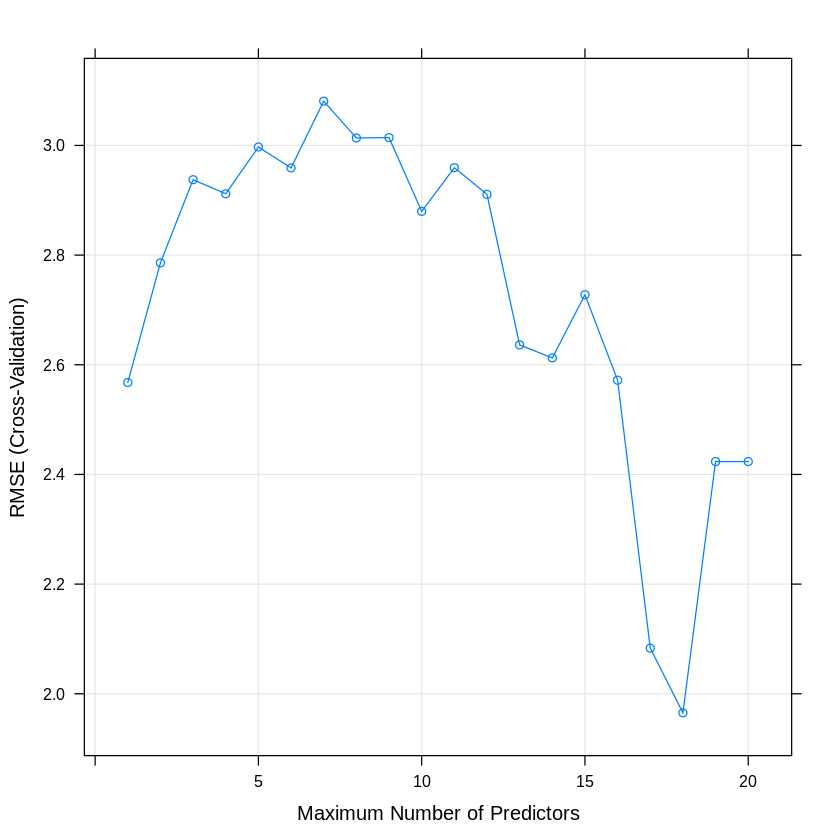

In [142]:
plot(step.model)

In [80]:
model_5 = lm(pizza~., sales)
model_5_min = lm(pizza~1, sales)
model_5_max = lm(pizza~., sales)

scp = list(lower=model_5_min,upper=model_5_max)

model_selected = stepAIC(model_5, 
                         direction='forward',
                         score=scp, 
                         steps=1)

summary(model_5)

Start:  AIC=59.23
pizza ~ weekday + staff + wraps + pasta + dessert + fruitcup + 
    chips + juice + soda + coffee + total_sales + temp + humidity + 
    rainfall + wind + food




Call:
lm(formula = pizza ~ ., data = sales)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5337 -0.9506  0.1591  0.7564  2.0087 

Coefficients: (1 not defined because of singularities)
                 Estimate Std. Error t value Pr(>|t|)   
(Intercept)      -1.66674    3.97855  -0.419  0.67915   
weekdayMonday     1.23528    1.37734   0.897  0.37909   
weekdayThursday   3.94176    1.83748   2.145  0.04273 * 
weekdayTuesday    4.67947    1.96843   2.377  0.02614 * 
weekdayWednesday  3.00408    1.47046   2.043  0.05268 . 
staffSara         1.09269    0.78998   1.383  0.17989   
staffTom          2.51507    1.52502   1.649  0.11270   
wraps             0.05069    0.08071   0.628  0.53618   
pasta             0.11028    0.09011   1.224  0.23339   
dessert           0.14979    0.12694   1.180  0.25005   
fruitcup          0.08841    0.34048   0.260  0.79744   
chips            -0.05786    0.05679  -1.019  0.31883   
juice            -0.08610    0.10042  -0.857  0.40007   
soda   

In [56]:
library(MASS)
library(car)
library(ggplot2)
library(dplyr)


library(scales) # Visualization
library(caTools) # Prediction: Splitting Data
library(car) # Prediction: Checking Multicollinearity
library(e1071) # Prediction: SVM, Naive Bayes, Parameter Tuning
library(rpart) # Prediction: Decision Tree
library(caret) # Prediction: k-Fold Cross Validatio
outlierTest(lm_step)

Loading required package: carData

Attaching package: ‘car’

The following object is masked from ‘package:dplyr’:

    recode



No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
   rstudent unadjusted p-value Bonferroni p
18 2.910895          0.0066197      0.28465

In [152]:
lm_step = lm(pizza ~ weekday + humidity + staff + dessert + total_sales +  soda, data = sales)
rss<-anova(lm_step)["Residuals", "Sum Sq"]
rss

[1] 84.87534

In [32]:
summary(lm_step)


Call:
lm(formula = pizza ~ weekday + humidity + staff + dessert + total_sales + 
    soda, data = sales)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.06174 -0.99589  0.06394  0.77025  2.96439 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -4.572614   1.878000  -2.435 0.020654 *  
weekdayMonday     1.699653   1.046001   1.625 0.113993    
weekdayThursday   4.080927   1.242567   3.284 0.002480 ** 
weekdayTuesday    4.984927   1.364267   3.654 0.000916 ***
weekdayWednesday  3.282669   1.039462   3.158 0.003455 ** 
humidity          0.094753   0.022365   4.237 0.000179 ***
staffSara         0.790680   0.653504   1.210 0.235177    
staffTom          3.155763   1.203885   2.621 0.013293 *  
dessert           0.224218   0.089948   2.493 0.018043 *  
total_sales      -0.020486   0.009864  -2.077 0.045926 *  
soda              0.059439   0.033714   1.763 0.087441 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [163]:
#plot(lm.selected)
RSS=anova(lm.selected)["Residuals", "Sum Sq"]
RSS

[1] 81.71237

In [34]:
sales[18,]
sales[10:20,]
mean(sales$pizza)

weekday,staff,pizza,wraps,pasta,dessert,fruitcup,chips,juice,soda,coffee,total_sales,temp,humidity,rainfall,wind
Thursday,Tom,11,19,12,9,2,4,2,31,28,180.63,28,55,0,9


weekday,staff,pizza,wraps,pasta,dessert,fruitcup,chips,juice,soda,coffee,total_sales,temp,humidity,rainfall,wind
Monday,Harry,2,13,3,6,2,16,7,19,27,119.57,37,47,0.00,9
Tuesday,Sara,3,10,5,5,1,2,0,33,30,172.31,38,56,0.00,14
Wednesday,Sara,4,15,4,4,2,9,6,20,27,137.65,33,69,0.00,14
Thursday,Sara,9,13,14,13,3,13,6,29,26,197.56,39,64,0.00,14
Friday,Sara,1,6,2,1,0,10,1,14,24,70.00,35,70,0.12,24
Monday,Harry,3,14,2,8,1,9,2,17,18,97.00,31,63,0.00,14
Tuesday,Sara,8,16,11,9,2,11,8,31,22,181.43,29,70,0.00,23
Wednesday,Sara,7,12,5,7,1,14,3,24,21,125.57,26,74,0.00,29
Thursday,Tom,11,19,12,9,2,4,2,31,28,180.63,28,55,0.00,9
Friday,Tom,2,4,0,2,2,25,2,15,23,75.87,30,47,0.00,6


[1] 4.860465

In [35]:
lm.day<-lm(pizza~weekday,data=sales)

In [36]:
summary(lm.day)


Call:
lm(formula = pizza ~ weekday, data = sales)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8750 -1.0000 -0.1667  1.1500  5.1250 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.1667     0.8058   2.689  0.01058 *  
weekdayMonday      1.3889     1.0402   1.335  0.18977    
weekdayThursday    3.7083     1.0659   3.479  0.00128 ** 
weekdayTuesday     4.5333     1.0192   4.448 7.32e-05 ***
weekdayWednesday   2.8333     1.0192   2.780  0.00841 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.974 on 38 degrees of freedom
Multiple R-squared:  0.4059,	Adjusted R-squared:  0.3434 
F-statistic:  6.49 on 4 and 38 DF,  p-value: 0.0004402


In [37]:
library(caret)
set.seed(1113)
train.control = trainControl(method = "repeatedcv", number =10, repeats=100)
model_new1= train(pizza ~ weekday,  data=sales, method="lm", trControl = train.control)
summary(model_new1)


Loading required package: lattice
Loading required package: ggplot2



Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8750 -1.0000 -0.1667  1.1500  5.1250 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.1667     0.8058   2.689  0.01058 *  
weekdayMonday      1.3889     1.0402   1.335  0.18977    
weekdayThursday    3.7083     1.0659   3.479  0.00128 ** 
weekdayTuesday     4.5333     1.0192   4.448 7.32e-05 ***
weekdayWednesday   2.8333     1.0192   2.780  0.00841 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.974 on 38 degrees of freedom
Multiple R-squared:  0.4059,	Adjusted R-squared:  0.3434 
F-statistic:  6.49 on 4 and 38 DF,  p-value: 0.0004402


In [38]:
model_2= train(pizza ~ weekday+temp+wind+humidity,  data=sales, method="lm", trControl = train.control)


In [39]:
model_weekday = lm(pizza ~ weekday, data=sales)

In [161]:
#Build linear regression model
model_all = lm(pizza ~ ., data = sales)

# Choosing the best model by AIC in a Stepwise Algorithm
# The step() function iteratively removes insignificant predictor variables from the model.
model_optimal = step(model_all, method="forward")


summary(model_optimal)


ERROR: Error in step(model_all, method = "forward"): AIC is -infinity for this model, so 'step' cannot proceed


In [41]:
anova(lm_step, model_weekday)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
32,81.71237,NA,NA,NA,NA
38,148.03056,-6,-66.31818,4.328561,0.002634956


In [42]:
library(cvTools)
lm.day<-lm(pizza~weekday,data=sales)
lm.day.weather<-lm(pizza~weekday+humidity+wind+temp,data=sales)
cv1<-cvFit(lm.day,y=sales$pizza,data=sales,k=10,R=100)
cv2<-cvFit(lm.day.weather,y=sales$pizza,data=sales,k=10,R=100)

Loading required package: robustbase


In [43]:
cv1$cv
cv2$cv
cv1$se
cv2$se

CV 
2.135405

CV 
2.129486

CV 
0.08639239

CV 
0.1252952

In [7]:

medical_dats = load("section_d.Rda")
medical_data = get(medical_dats)
head(medical_data)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,glucagon,log_glucagon,diabetes
4,1,89,66,23,94,28.1,0.167,21,1.113194,0.1072331,neg
5,0,137,40,35,168,43.1,2.288,33,3.376885,1.2169536,pos
7,3,78,50,32,88,31.0,0.248,26,13.606157,2.6105224,pos
9,2,197,70,45,543,30.5,0.158,53,1.608079,0.4750404,pos
14,1,189,60,23,846,30.1,0.398,59,4.689861,1.5454030,pos
15,5,166,72,19,175,25.8,0.587,51,5.716373,1.7433345,pos


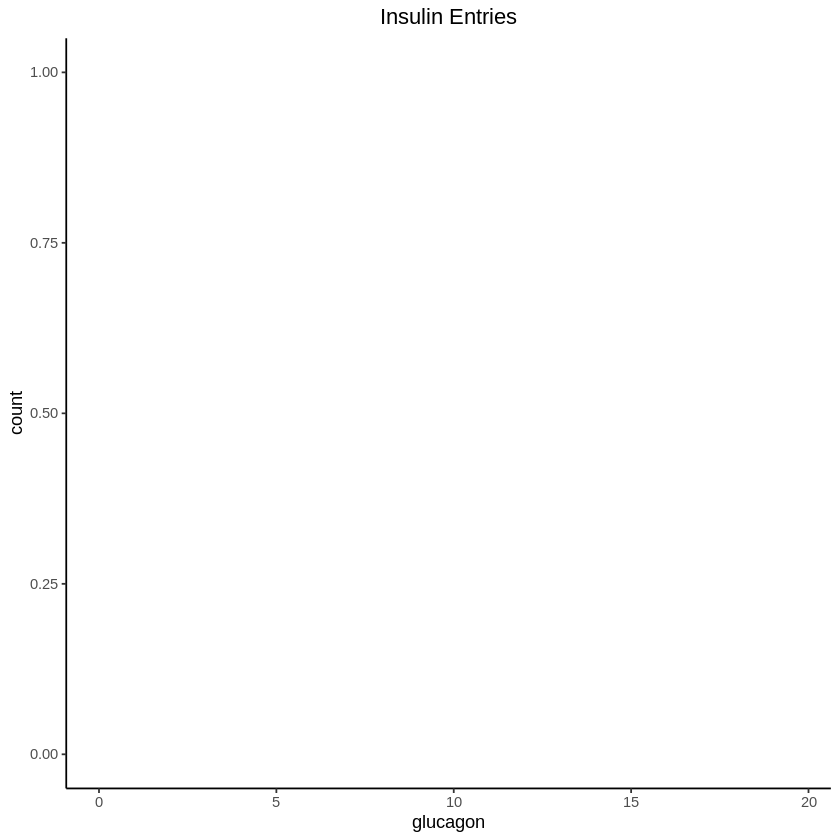

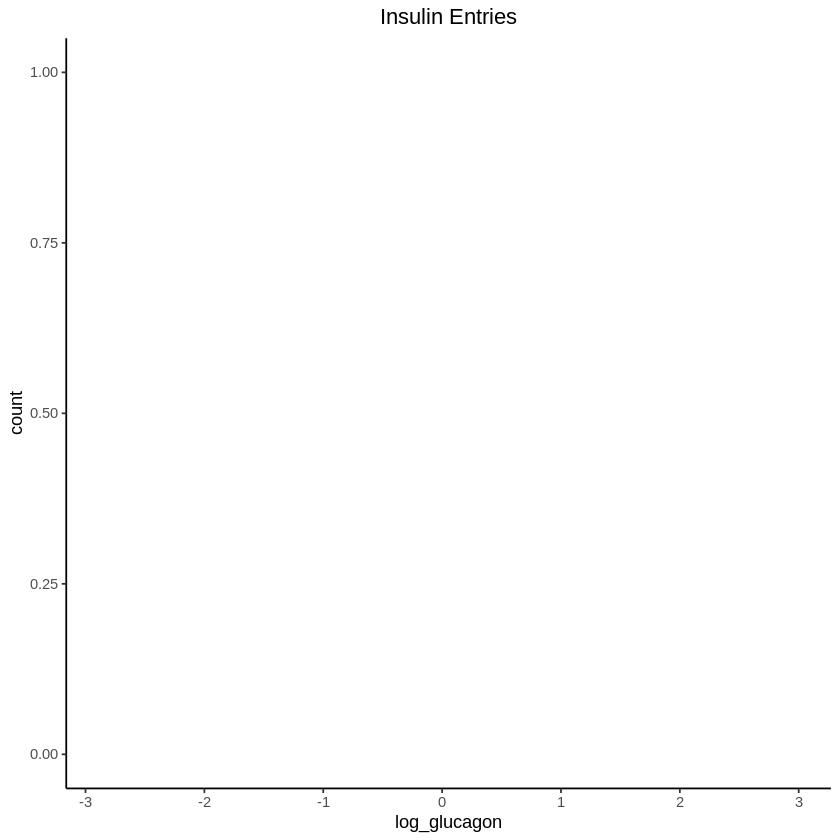

In [9]:
ggplot(medical_data, aes(x = glucagon)) + geom_bar() + theme_classic() + 
  ggtitle('Insulin Entries') +
  theme(plot.title = element_text(hjust = 0.5))
  
  
ggplot(medical_data, aes(x =log_glucagon)) + geom_bar() + theme_classic() + 
  ggtitle('Insulin Entries') +
  theme(plot.title = element_text(hjust = 0.5))


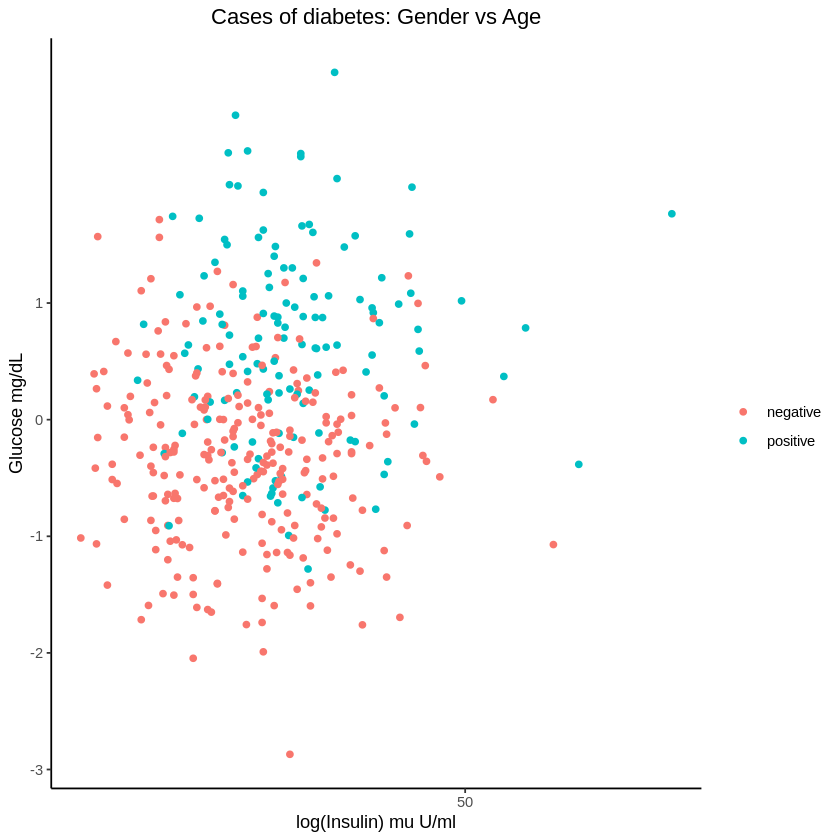

In [11]:


ggplot(medical_data, aes(x = mass, y = log_glucagon, col = diabetes)) + geom_point() + theme_classic() + 
  scale_y_continuous('Glucose mg/dL', breaks = c(-1, -2, -3, 0, 1)) +
  scale_x_continuous('log(Insulin) mu U/ml', breaks = c(50, 100, 150, 200, 250)) + 
  ggtitle('Cases of diabetes: Gender vs Age') +
  theme(plot.title = element_text(hjust = 0.5)) +
  scale_color_discrete(name = '', labels = c('negative', 'positive'))

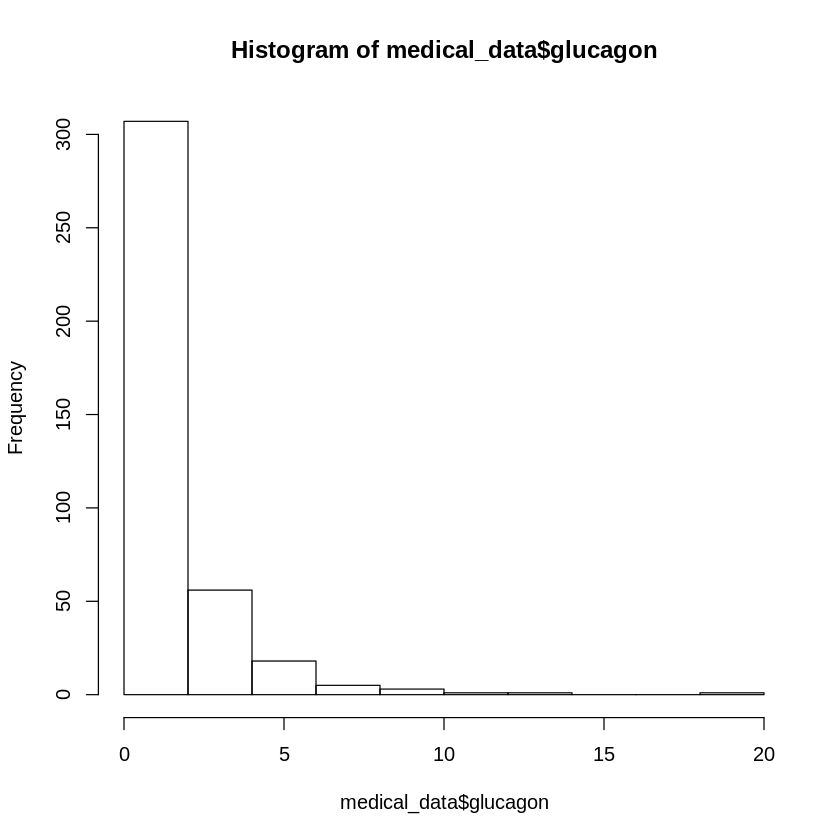

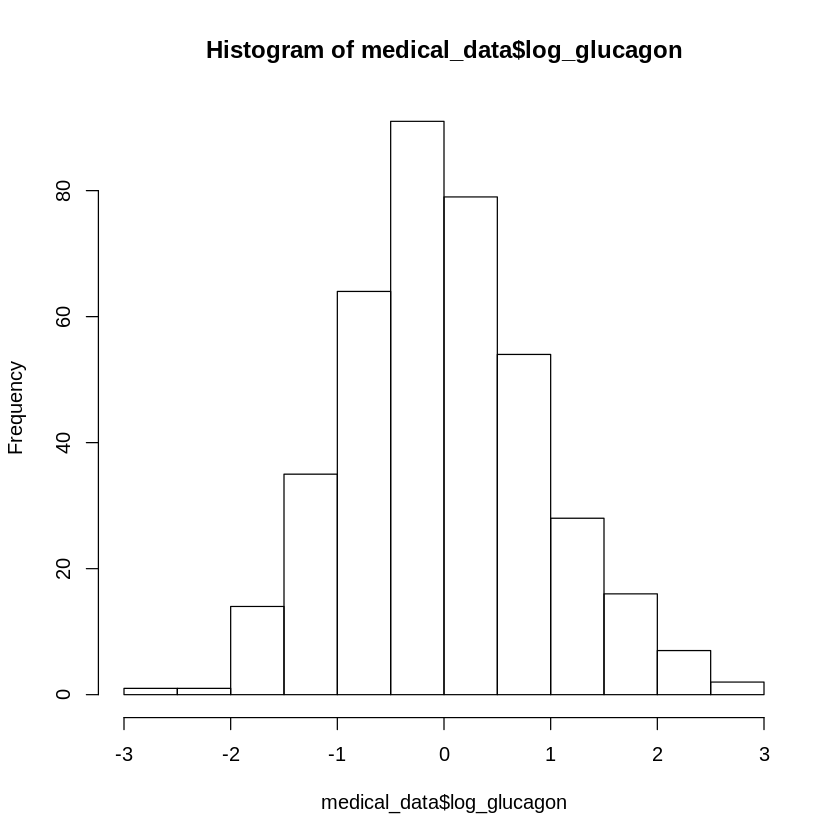

In [46]:
hist(medical_data$glucagon)
hist(medical_data$log_glucagon)

In [58]:
summary(medical_data $ log_glucagon_rs)
summary(medical_data $ mass_rs)

Length  Class   Mode 
     0   NULL   NULL 

Length  Class   Mode 
     0   NULL   NULL 

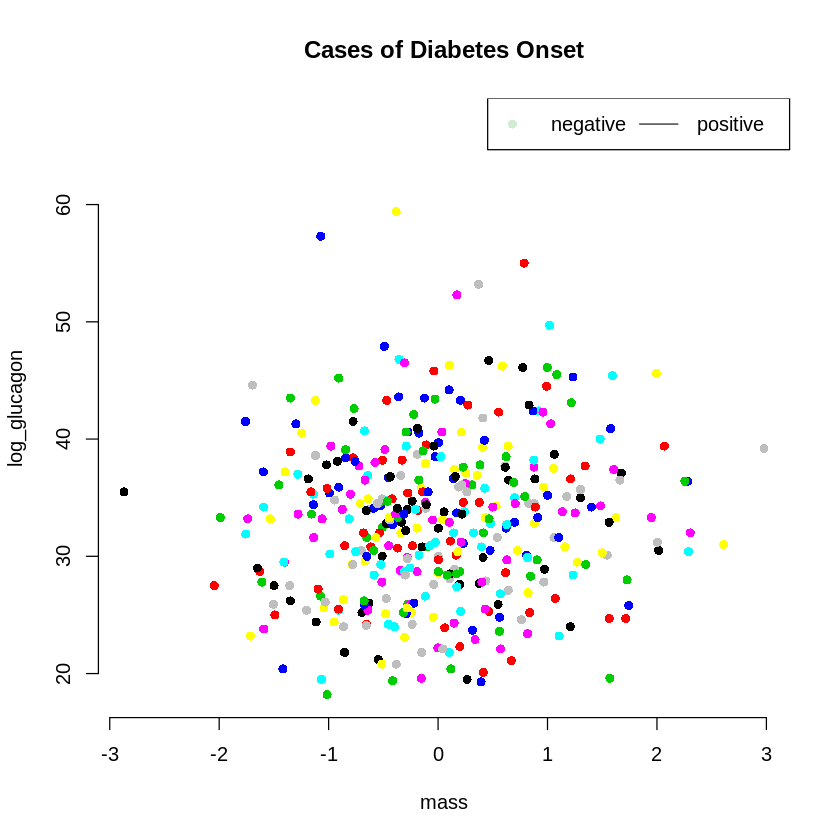

In [160]:
# Color of the points
color_points = rgb(red = 110, green = 200, blue = 110, alpha = 80, maxColorValue = 255)

# Color  of the points2
color_points2 = rgb(red = 0, green = 0, blue = 10, alpha = 455, maxColorValue = 500)

plot(
   mass ~ log_glucagon, data = medical_data,
   main = "Cases of Diabetes Onset",
  xlab = "mass",
  ylab = "log_glucagon",
  frame.plot = FALSE,
  pch = 16,
  col = factor(medical_data$log_glucagon)
)



# Legend
legend("topright", cex =1, legend= c("negative","positive"),pch = c(16,NA), lty=c(NA,1), col=c(color_points,color_points2), horiz=T)





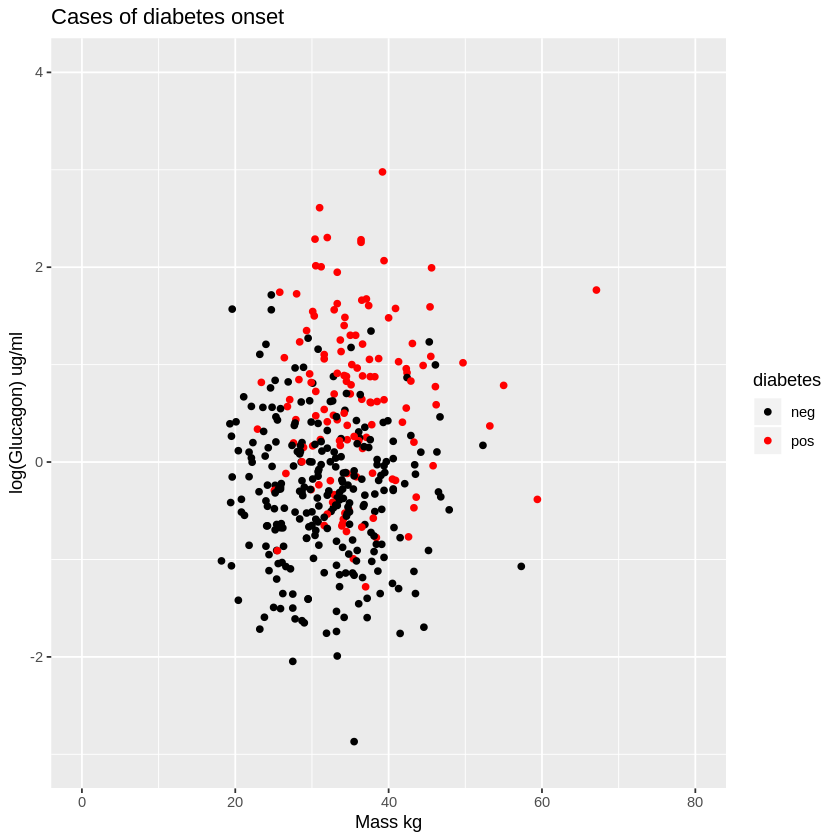

In [51]:
ggplot(data = medical_data) + 
    geom_point(mapping = aes(x = mass, y=log_glucagon, color = diabetes))+
    scale_color_manual(values=c('black','red'))+
    scale_x_continuous(limits = c(0, 80)) +
    scale_y_continuous(limits = c(-3, 4)) +
    labs(y = "log(Glucagon) ug/ml", x="Mass kg") +
    ggtitle("Cases of diabetes onset")

In [59]:
medical_data$log_glucagon_rs <- scale(medical_data$log_glucagon)
medical_data$mass_rs <- scale(medical_data$mass)
summary(medical_data $ log_glucagon_rs)
summary(medical_data $ mass_rs)

       V1          
 Min.   :-3.17809  
 1st Qu.:-0.65773  
 Median :-0.09217  
 Mean   : 0.00000  
 3rd Qu.: 0.63723  
 Max.   : 3.29819  

       V1          
 Min.   :-2.11823  
 1st Qu.:-0.66683  
 Median : 0.01619  
 Mean   : 0.00000  
 3rd Qu.: 0.57114  
 Max.   : 4.83999  

In [159]:
predicted_probs_test = predict(classifier_logreg, type = 'response', newdata = test_data)
y_pred_test = ifelse(predicted_probs_test > 0.5, 'pos', 'neg')

table(test_data$diabetes,y_pred_test)
test_data$predicted_type = y_pred_test
test_data[test_data$predicted_type == "pos",]
tpr = length(test_data[test_data$diabetes== y_pred_test & y_pred_test == "pos",] )/length(test_data[test_data$diabetes=="pos",])
tpr

     y_pred_test
      neg pos
  neg  97   6
  pos  24  30

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,glucagon,log_glucagon,diabetes,log_glucagon_rs,mass_rs,predicted_type
5,0,137,40,35,168,43.1,2.288,33,3.3768847,1.2169536,pos,1.3477438,1.42490909,pos
7,3,78,50,32,88,31.0,0.248,26,13.6061566,2.6105224,pos,2.8910843,-0.29685909,pos
15,5,166,72,19,175,25.8,0.587,51,5.7163726,1.7433345,pos,1.9306967,-1.03679252,pos
25,11,143,94,33,146,36.6,0.254,51,3.3559864,1.2107457,pos,1.3408688,0.49999230,pos
44,9,171,110,24,240,45.4,0.721,54,4.9178985,1.5928813,pos,1.7640738,1.75218734,pos
69,1,95,66,13,38,19.6,0.334,25,4.8057286,1.5698087,neg,1.7385215,-1.91902084,pos
70,4,146,85,27,100,28.9,0.189,27,2.6448992,0.9726330,neg,1.0771652,-0.59567836,pos
100,1,122,90,51,220,49.7,0.325,31,2.7702572,1.0189402,pos,1.1284492,2.36405537,pos
121,0,162,76,56,100,53.2,0.759,25,1.4486124,0.3706062,pos,0.4104365,2.86208749,pos
126,1,88,30,42,99,55.0,0.496,26,2.1964167,0.7868273,pos,0.8713903,3.11821830,pos


[1] 1

In [125]:
mean(medical_data$log_glucagon_rs)
mean(medical_data$mass_rs)

sd(medical_data$log_glucagon_rs)
sd(medical_data$mass_rs)


[1] 1.670404e-17

[1] 1.514141e-16

[1] 1

[1] 1

In [126]:
head(medical_data)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,glucagon,log_glucagon,diabetes,log_glucagon_rs,mass_rs
4,1,89,66,23,94,28.1,0.167,21,1.113194,0.1072331,neg,0.1187578,-0.7095143
5,0,137,40,35,168,43.1,2.288,33,3.376885,1.2169536,pos,1.3477438,1.4249091
7,3,78,50,32,88,31.0,0.248,26,13.606157,2.6105224,pos,2.8910843,-0.2968591
9,2,197,70,45,543,30.5,0.158,53,1.608079,0.4750404,pos,0.5260947,-0.3680065
14,1,189,60,23,846,30.1,0.398,59,4.689861,1.5454030,pos,1.7114928,-0.4249245
15,5,166,72,19,175,25.8,0.587,51,5.716373,1.7433345,pos,1.9306967,-1.0367925


In [86]:
sectione = load("section_e.Rda")
sectione

[1] "medical_data" "test_data"    "train_data"

In [87]:
wtf = get(sectione[2])

In [88]:
head(wtf)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,glucagon,log_glucagon,diabetes,log_glucagon_rs,mass_rs
4,1,89,66,23,94,28.1,0.167,21,1.1131937,0.10723306,neg,0.11875777,-0.7095143
5,0,137,40,35,168,43.1,2.288,33,3.3768847,1.21695360,pos,1.34774384,1.4249091
7,3,78,50,32,88,31.0,0.248,26,13.6061566,2.61052238,pos,2.89108431,-0.2968591
15,5,166,72,19,175,25.8,0.587,51,5.7163726,1.74333445,pos,1.93069668,-1.0367925
17,0,118,84,47,230,45.8,0.551,31,0.9628553,-0.03785219,pos,-0.04192029,1.8091053
25,11,143,94,33,146,36.6,0.254,51,3.3559864,1.21074573,pos,1.34086879,0.4999923


In [89]:
train=get(sectione[3])
test=wtf

In [90]:
head(train)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,glucagon,log_glucagon,diabetes,log_glucagon_rs,mass_rs
217,5,109,62,41,129,35.8,0.514,25,0.8596743,-0.1512017,pos,-0.1674519,0.3861564
298,0,126,84,29,215,30.7,0.520,24,0.6910895,-0.3694860,neg,-0.4091959,-0.3395476
442,2,83,66,23,50,32.2,0.497,22,0.7436729,-0.2961540,neg,-0.3279827,-0.1261052
689,1,140,74,26,180,24.1,0.828,23,0.5189233,-0.6559992,neg,-0.7265017,-1.2786938
162,7,102,74,40,105,37.2,0.204,45,0.2469354,-1.3986287,neg,-1.5489442,0.5853692
673,10,68,106,23,49,35.5,0.285,47,0.3128466,-1.1620422,neg,-1.2869309,0.3434679


In [91]:
classifier_logreg = glm(diabetes ~ log_glucagon_rs + mass_rs, family = binomial(link='logit'), data = train)
model1 <- glm(diabetes~log_glucagon_rs+mass_rs,data=train_data,family=binomial)

In [92]:
summary(test)

    pregnant         glucose       pressure        triceps         insulin   
 Min.   : 0.000   Min.   : 56   Min.   : 24.0   Min.   : 7.00   Min.   : 14  
 1st Qu.: 1.000   1st Qu.: 98   1st Qu.: 64.0   1st Qu.:19.00   1st Qu.: 73  
 Median : 2.000   Median :114   Median : 72.0   Median :28.00   Median :114  
 Mean   : 3.223   Mean   :119   Mean   : 71.4   Mean   :28.54   Mean   :138  
 3rd Qu.: 5.000   3rd Qu.:139   3rd Qu.: 80.0   3rd Qu.:35.00   3rd Qu.:180  
 Max.   :17.000   Max.   :191   Max.   :110.0   Max.   :63.00   Max.   :600  
      mass          pedigree           age            glucagon.V1    
 Min.   :18.20   Min.   :0.1150   Min.   :21.00   Min.   : 0.129235  
 1st Qu.:27.80   1st Qu.:0.2860   1st Qu.:23.00   1st Qu.: 0.601638  
 Median :32.00   Median :0.4630   Median :27.00   Median : 1.000688  
 Mean   :32.53   Mean   :0.5295   Mean   :31.01   Mean   : 1.519069  
 3rd Qu.:36.50   3rd Qu.:0.6780   3rd Qu.:36.00   3rd Qu.: 1.770320  
 Max.   :59.40   Max.   :2.4200   

In [93]:
summary(classifier_logreg)
summary(model1)


Call:
glm(formula = diabetes ~ log_glucagon_rs + mass_rs, family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9003  -0.7444  -0.4413   0.7784   2.3769  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -0.9621     0.1722  -5.587 2.31e-08 ***
log_glucagon_rs   1.2204     0.1949   6.261 3.82e-10 ***
mass_rs           0.5301     0.1801   2.943  0.00325 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 295.82  on 234  degrees of freedom
Residual deviance: 227.56  on 232  degrees of freedom
AIC: 233.56

Number of Fisher Scoring iterations: 5



Call:
glm(formula = diabetes ~ log_glucagon_rs + mass_rs, family = binomial, 
    data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9003  -0.7444  -0.4413   0.7784   2.3769  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -0.9621     0.1722  -5.587 2.31e-08 ***
log_glucagon_rs   1.2204     0.1949   6.261 3.82e-10 ***
mass_rs           0.5301     0.1801   2.943  0.00325 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 295.82  on 234  degrees of freedom
Residual deviance: 227.56  on 232  degrees of freedom
AIC: 233.56

Number of Fisher Scoring iterations: 5


In [148]:
prediction = predict(classifier_logreg, data=train)
#prediction
confusionMatrix(prediction)

ERROR: Error in is.factor(reference): argument "reference" is missing, with no default


In [94]:

# Predicting the Validation set results
prediction = predict(classifier_logreg, type = 'response', newdata = test)
y_pred = ifelse(prediction > 0.5, 1, 0)


# Checking the prediction accuracy
table(y_pred > 0.5, test$diabetes) # Confusion matrix

       
        neg pos
  FALSE  97  24
  TRUE    6  30

In [95]:
#table(predicted=prediction, actual=test$diabetes)

In [96]:
prob_medical_data <- predict(model1,type="resp",newdata = test_data)

In [97]:
#prediction

In [98]:
#prob_medical_data

In [99]:
model1 <- glm(diabetes~log_glucagon_rs+mass_rs,data=train_data,family=binomial)

#e2
prob_medical_data <- predict(model1,type="resp",newdata = test_data)
pred_medical_data <- ifelse(prob_medical_data>0.5, "pos", "neg")

#e3
table(predicted=pred_medical_data, actual=test_data$diabetes)
#confusionMatrix(pred_medical_data, test$diabetes)
summary(data.frame(pred_medical_data))

         actual
predicted neg pos
      neg  97  24
      pos   6  30

 pred_medical_data
 neg:121          
 pos: 36          

In [100]:
train_data_x = train_data
train_data_x$glucose_rs = scale(train_data_x$glucose)
#already has mass_rs

test_data_x = test_data
test_data_x$glucose_rs = scale(test_data_x$glucose)

In [102]:
ftable(sales$pizza)

 0 1 2 3 4 5 6 7 8 9 11
                       
 1 2 4 7 8 2 8 4 5 1  1

In [204]:
table( pred_medical_data, test$diabetes ) # Confusion matrix
table(test$diabetes, y_pred > 0.5)

                 
pred_medical_data neg pos
                0  97  24
                1   6  30

     
      FALSE TRUE
  neg    97    6
  pos    24   30

In [170]:
#correctly predicted
25/70

[1] 0.3571429

In [214]:
error <- mean(test$diabetes != pred_medical_data) # Misclassification error
paste('Accuracy',round(1-error,10))   #0.3

[1] "Accuracy 0.7834394904"

In [217]:
error <- mean(test$diabetes != pred_medical_data) # Misclassification error
paste('Accuracy',round(1-error,10))   #0.5

[1] "Accuracy 0.8089171975"

In [84]:
train_data_x = train_data
train_data_x$glucose_rs = scale(train_data_x$glucose)
#already has mass_rs

test_data_x = test_data
test_data_x$glucose_rs = scale(test_data_x$glucose)

ERROR: Error in eval(expr, envir, enclos): object 'train_data' not found


In [303]:
#knn

model_knn <- train(diabetes~ log_glucagon_rs+mass_rs, data=train, method="knn") #,tuneGrid = expand.grid(k = 1:10),# tuneGrid = expand.grid(k = 1:100))
    #trControl=method("none"))

In [304]:
summary(model_knn)
print(model_knn)

            Length Class      Mode     
learn       2      -none-     list     
k           1      -none-     numeric  
theDots     0      -none-     list     
xNames      2      -none-     character
problemType 1      -none-     character
tuneValue   1      data.frame list     
obsLevels   2      -none-     character
param       0      -none-     list     

k-Nearest Neighbors 

235 samples
  2 predictor
  2 classes: 'neg', 'pos' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 235, 235, 235, 235, 235, 235, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.7160526  0.3462861
  7  0.7325985  0.3759634
  9  0.7408694  0.3898639

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.


In [305]:
y_pred = predict(model_knn, newdata = test)


error <- mean(test$diabetes != y_pred) # Misclassification error
paste('Accuracy',round(1-error,4))

[1] "Accuracy 0.7962"

In [322]:
K_values = c( seq(2,12,2), seq(15,55,5), seq(60,200,10) )

set.seed(123)
model_knn_2 <- train(diabetes~ log_glucagon_rs+mass_rs, data=train, method="knn", tuneGrid = expand.grid(k = K_values))

In [323]:
t = plot(model_knn_2)

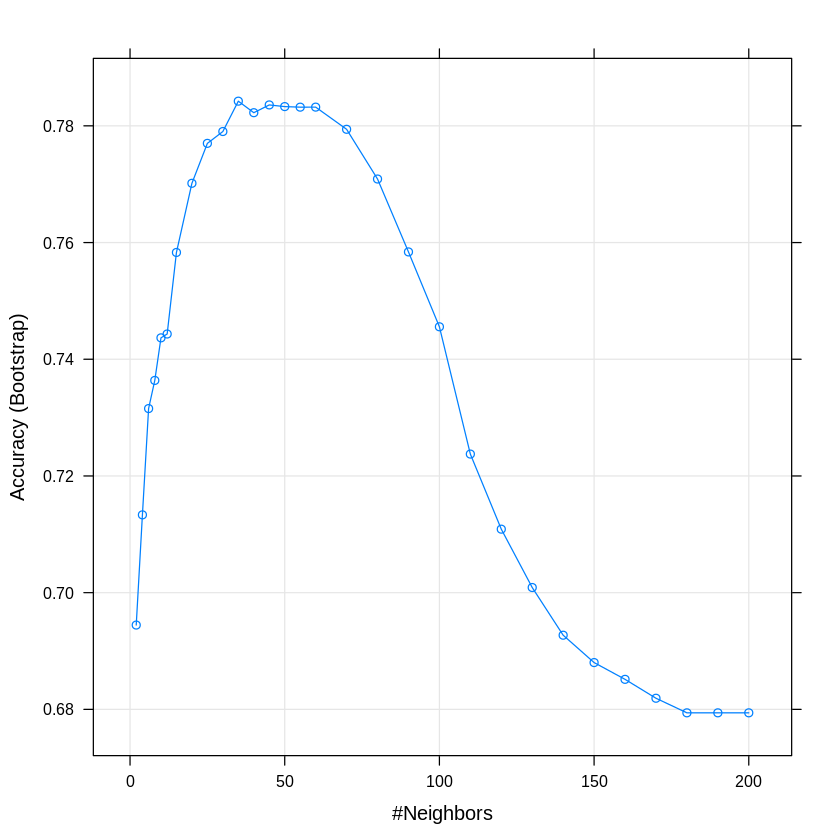

In [324]:
t

In [325]:
print(model_knn_2)

y_pred = predict(model_knn_2, newdata = test)


error <- mean(test$diabetes != y_pred) # Misclassification error
paste('Accuracy',round(1-error,4))

k-Nearest Neighbors 

235 samples
  2 predictor
  2 classes: 'neg', 'pos' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 235, 235, 235, 235, 235, 235, ... 
Resampling results across tuning parameters:

  k    Accuracy   Kappa     
    2  0.6944503  0.30119062
    4  0.7133332  0.33362086
    6  0.7315505  0.36271521
    8  0.7363729  0.36425503
   10  0.7436682  0.37734977
   12  0.7443270  0.37534079
   15  0.7583015  0.39979607
   20  0.7701550  0.42629943
   25  0.7769978  0.44459174
   30  0.7790267  0.44221541
   35  0.7842299  0.45382247
   40  0.7822534  0.44619140
   45  0.7835841  0.44633260
   50  0.7832988  0.44197082
   55  0.7832028  0.43836926
   60  0.7832084  0.43800478
   70  0.7794087  0.42306110
   80  0.7708882  0.38804984
   90  0.7583930  0.34417689
  100  0.7455633  0.29701931
  110  0.7237517  0.20781601
  120  0.7108834  0.14879327
  130  0.7008831  0.10527445
  140  0.6927114  0.07407018
  150  0.6880210  0.04895847
  160  0.6

[1] "Accuracy 0.8153"

In [326]:
full = bind_rows(train, test)

In [327]:
dim(train)
dim(test)
dim(full)

[1] 235  13

[1] 157  13

[1] 392  13

In [328]:
235/392

[1] 0.5994898

In [344]:
set.seed(123)
train.control = trainControl(method = "repeatedcv", p=0.6, repeats=20)

In [345]:
model_knn_3 <- train(diabetes~ log_glucagon_rs+mass_rs, data=train, method="knn", tuneGrid = expand.grid(k = K_values), trControl = train.control)

In [346]:
summary(model_knn_3)

            Length Class      Mode     
learn       2      -none-     list     
k           1      -none-     numeric  
theDots     0      -none-     list     
xNames      2      -none-     character
problemType 1      -none-     character
tuneValue   1      data.frame list     
obsLevels   2      -none-     character
param       0      -none-     list     

In [347]:
print(model_knn_3)

k-Nearest Neighbors 

235 samples
  2 predictor
  2 classes: 'neg', 'pos' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 20 times) 
Summary of sample sizes: 212, 212, 212, 211, 212, 211, ... 
Resampling results across tuning parameters:

  k    Accuracy   Kappa       
    2  0.6784280  0.2733295355
    4  0.7285433  0.3645488299
    6  0.7542498  0.4179747618
    8  0.7524909  0.4067052384
   10  0.7635343  0.4237065663
   12  0.7781168  0.4534961795
   15  0.7894293  0.4755179621
   20  0.7873839  0.4719144923
   25  0.7869590  0.4682197704
   30  0.7809708  0.4446769992
   35  0.7839213  0.4479254618
   40  0.7879430  0.4540061493
   45  0.7839213  0.4418228919
   50  0.7907617  0.4580177493
   55  0.7890234  0.4472654091
   60  0.7902923  0.4488302047
   70  0.7811339  0.4141123847
   80  0.7607493  0.3418234610
   90  0.7546896  0.3120806788
  100  0.7027108  0.1155451231
  110  0.6761817  0.0004855483
  120  0.6774868  0.0028235294
  130  0.6768347  0.000000000

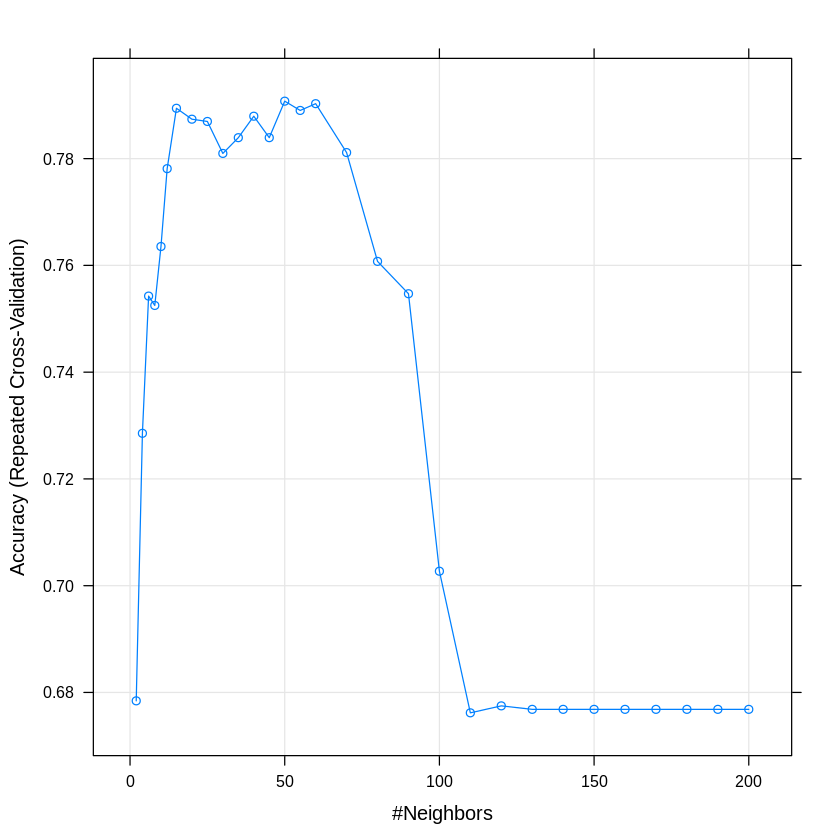

In [348]:
plot(model_knn_3)

ERROR: Error in knn(train = train_data_x, test = test_data_x, cl = train_data_y, : could not find function "knn"


In [350]:
 library(class)

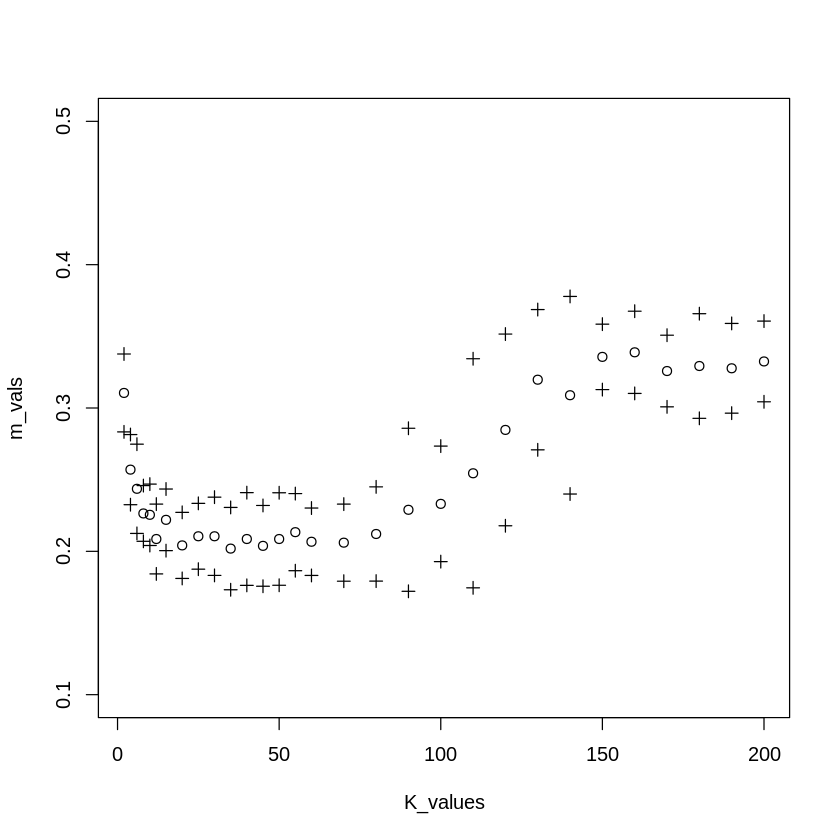

In [351]:
K_values = c( seq(2,12,2), seq(15,55,5), seq(60,200,10) )
m_vals <- rep(0,30)
sd_vals <- rep(0,30)

for (i in 1:30){
  missclass_vals <- rep(0,20)
  for (j in 1:20){
    train_rows <- sample(1:392,235)
    train_data <- medical_data[train_rows,]
    test_data <- medical_data[-train_rows,]
    train_data_x <- dplyr::select(train_data, log_glucagon_rs, mass_rs)
    test_data_x <- dplyr::select(test_data, log_glucagon_rs, mass_rs)
    train_data_y <- unlist(train_data$diabetes)
    test_data_y <- unlist(test_data$diabetes)
    pred_knn <- knn(train = train_data_x, test = test_data_x, cl = train_data_y,k = K_values[i])
    missclass_vals[j] <- sum(pred_knn!=test_data$diabetes)/length(test_data_y)
  }
  m_vals[i]<-mean(missclass_vals)
  sd_vals[i]<-sd(missclass_vals)
}
plot(K_values,m_vals,ylim=c(0.10,0.50))
points(K_values,m_vals+sd_vals,pch=3)
points(K_values,m_vals-sd_vals,pch=3)

In [384]:
set.seed(124)
#train.control = trainControl(method = "repeatedcv", number=5, repeats=3)
model_nb = train(diabetes ~ log_glucagon_rs+mass_rs,  data=train, method="nb") #, trControl = train.control)


Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 81”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 82”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 82”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 85”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 84”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 79”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 92”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 86”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 93”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 82”

In [388]:
dim(train)
print(model_nb)

[1] 235  13

Naive Bayes 

235 samples
  2 predictor
  2 classes: 'neg', 'pos' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 235, 235, 235, 235, 235, 235, ... 
Resampling results across tuning parameters:

  usekernel  Accuracy   Kappa    
  FALSE      0.7866762  0.4789765
   TRUE      0.7829310  0.4694118

Tuning parameter 'fL' was held constant at a value of 0
Tuning
 parameter 'adjust' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were fL = 0, usekernel = FALSE and adjust
 = 1.


In [386]:
y_pred_ = predict(model_nb, newdata = test)


error <- mean(test$diabetes != y_pred_) # Misclassification error
paste('Accuracy',round(1-error,4))

[1] "Accuracy 0.8089"

In [372]:
prob_medical_data <- predict(model_nb,newdata = test)
#pred_medical_data <- ifelse(prob_medical_data>0.5, "pos", "neg")

#e3
confusionMatrix(pred_medical_data, test$diabetes)

ERROR: Error: `data` and `reference` should be factors with the same levels.


In [370]:
prob_medical_data

[1] neg pos pos pos neg pos neg neg neg neg neg pos neg neg neg neg pos neg
 [19] neg neg neg neg pos neg neg neg neg neg neg neg neg neg neg neg pos neg
 [37] neg neg neg neg neg neg neg neg neg neg neg neg neg neg neg neg pos neg
 [55] neg neg neg neg neg pos neg pos pos neg pos neg pos neg neg neg neg neg
 [73] neg neg neg neg neg pos neg neg neg neg neg neg neg neg neg pos neg pos
 [91] neg pos neg neg pos neg neg neg neg neg neg neg pos neg neg pos neg neg
[109] neg neg neg neg neg neg neg neg neg neg pos neg neg pos neg neg neg neg
[127] neg neg neg pos pos neg neg neg neg neg neg neg neg neg neg pos neg neg
[145] neg neg neg pos neg neg neg neg neg neg neg pos neg
Levels: neg pos

In [371]:
test$diabetes

[1] neg pos pos pos pos pos pos neg neg neg neg pos neg neg neg neg neg pos
 [19] neg neg neg pos neg neg pos pos pos neg neg neg neg neg neg neg pos neg
 [37] pos neg neg neg pos pos pos pos neg pos pos pos pos neg pos neg pos pos
 [55] neg neg neg neg neg neg neg pos pos pos pos neg pos neg neg neg neg pos
 [73] neg neg neg neg neg pos neg pos neg neg neg neg neg neg neg pos neg neg
 [91] neg pos neg neg pos neg pos neg pos neg neg neg pos neg neg pos neg pos
[109] neg pos neg neg pos neg neg neg neg neg pos neg neg pos neg neg neg neg
[127] pos neg neg pos pos neg neg neg neg neg neg pos pos neg neg pos pos neg
[145] neg neg neg pos neg neg neg neg neg neg neg pos neg
Levels: neg pos

In [365]:
test

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,glucagon,log_glucagon,diabetes,log_glucagon_rs,mass_rs
4,1,89,66,23,94,28.1,0.167,21,1.1131937,0.1072330575,neg,0.1187577676,-0.70951427
5,0,137,40,35,168,43.1,2.288,33,3.3768847,1.2169535974,pos,1.3477438385,1.42490909
7,3,78,50,32,88,31.0,0.248,26,13.6061566,2.6105223833,pos,2.8910843148,-0.29685909
15,5,166,72,19,175,25.8,0.587,51,5.7163726,1.7433344519,pos,1.9306966765,-1.03679252
17,0,118,84,47,230,45.8,0.551,31,0.9628553,-0.0378521883,pos,-0.0419202948,1.80910530
25,11,143,94,33,146,36.6,0.254,51,3.3559864,1.2107457272,pos,1.3408687868,0.49999230
26,10,125,70,26,115,31.1,0.205,41,1.2597734,0.2309318575,pos,0.2557509084,-0.28262960
28,1,97,66,15,140,23.2,0.487,22,3.0210888,1.1056173039,neg,1.2244418458,-1.40675924
29,13,145,82,19,110,22.2,0.245,57,0.9984553,-0.0015458550,neg,-0.0017119934,-1.54905413
33,3,88,58,11,54,24.8,0.267,22,0.9563265,-0.0446559386,neg,-0.0494552679,-1.17908741


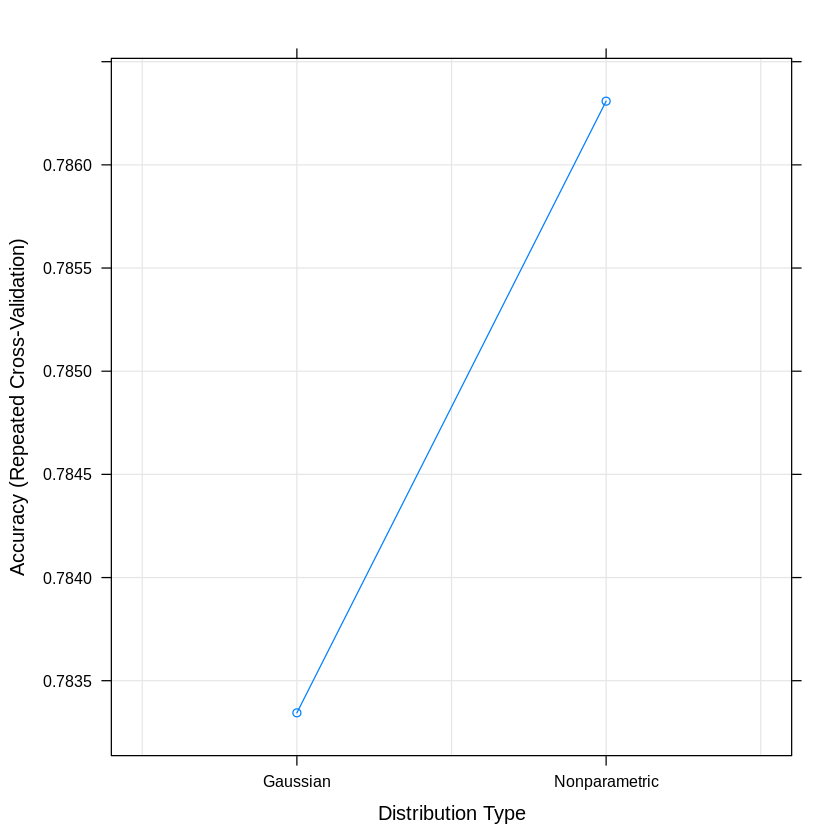

In [379]:
plot(model_nb)

In [129]:
knn_rda = load("section_e_knn.Rda")

Warning message in readChar(con, 5L, useBytes = TRUE):
“cannot open compressed file 'section_e_knn.Rda', probable reason 'No such file or directory'”

ERROR: Error in readChar(con, 5L, useBytes = TRUE): cannot open the connection


In [130]:
train_data_x = select(train_data, log_glucagon_rs, mass_rs)
head(train_data_x,2)
dim(train_data_x)

train_data_y = select(train_data, diabetes)
head(train_data_y,2)
dim(train_data_y)

test_data_x = select(test_data, log_glucagon_rs, mass_rs)
head(test_data_x,2)
dim(test_data_x)

test_data_y = select(test_data, diabetes)
head(test_data_y,2)
dim(test_data_y)

ERROR: Error in select(train_data, log_glucagon_rs, mass_rs): unused arguments (log_glucagon_rs, mass_rs)


In [127]:
library(class)
train_data_y = unlist(train_data_y)

K_values = c(seq(2,12,2),seq(15,55,5),seq(60,200,10))

MisclassRate = seq(0,30)

for( i in 1:30){
  k_val = K_values[i]
  knn_classifier_loop = knn(train_data_x, test_data_x, train_data_y, k = k_val, l = 0, prob = FALSE, use.all = TRUE)
  
  #print(k_val)
  



Error_Test_KNN_loop = mean(test_data$diabetes != knn_classifier_loop)
Accuracy_KNN_loop = round(1-Error_Test_KNN_loop,6)
MisclassRate[i] = 1-Accuracy_KNN_loop
  
  
  
  
  
}

MisclassRate = MisclassRate[1:30]

plot(MisclassRate ~K_values )

ERROR: Error in unlist(train_data_y): object 'train_data_y' not found
